<a href="https://colab.research.google.com/github/AnkitPatel745/OpenCV-Project-Pencil-Sketch-and-Cartoon-Paint-/blob/main/OpenCV_Starter_Project_(Pencil_Sketch_and_Cartoon_Paint)_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# # Finding the Path Of the File
# import os
# os.getcwd()

In [ ]:
# Intalling the opencv library
!pip install opencv-python

In [ ]:
# Importing the Library  
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as matim
import ipywidgets as widgets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


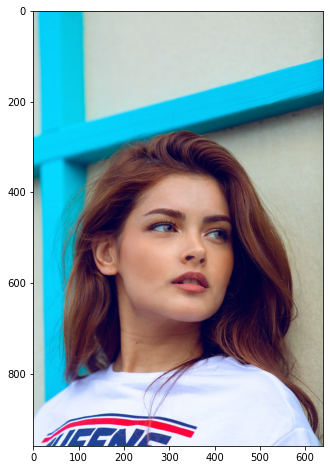

In [ ]:
# Importing the image from directory
img = matim.imread('/content/drive/MyDrive/Data Science Project(Self)/OpenCV/OpenCV Project/images/g2.jpg')
plt.figure(figsize=(15,8))
plt.imshow(img)

plt.show()

### Preserving Filters

In [ ]:
# creating the image of orignal and the filter image 
@widgets.interact_manual(s=(0,200,1),r=(0,1,0.1))
def edgePreserve(s=50,r=0.5):
    edgeImg = cv2.edgePreservingFilter(img, sigma_s=s, sigma_r=r)
    plt.figure(figsize=(18,8))
    plt.subplot(1,2,1)
    plt.title('Original Img')
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.title('Blor Filtered Img')
    plt.imshow(edgeImg)
    plt.show()

interactive(children=(IntSlider(value=50, description='s', max=200), FloatSlider(value=0.5, description='r', m…

In [ ]:
@widgets.interact_manual(s=(1,200,1),r=(0,1,0.1))
def detail(s=20,r=0.2):
    detailImg = cv2.detailEnhance(img, sigma_s=s, sigma_r=r)
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    plt.title("Original Image")
    plt.imshow(img)
    plt.subplot(1,2,2)
    plt.title("Filtered Image")
    plt.imshow(detailImg)
    plt.show()

interactive(children=(IntSlider(value=20, description='s', max=200, min=1), FloatSlider(value=0.2, description…

### Creating the Look UP table

In [ ]:
def adjust_gamma(image,gamma=1):
    invGamma = 1.0/gamma
    table = np.array([(i/255)**invGamma*255 for i in np.arange(0,256)])
    lut_img = cv2.LUT(image.astype(np.uint8),table.astype(np.uint8))
    return lut_img

## Image to Pencil Sketch

In [ ]:
ksize = 21
sigmaX= 9
gamma = 0.1
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray,(ksize,ksize),sigmaX)
gray_blur_divide = cv2.divide(gray,gray_blur,scale=255)
pencil_sketch =adjust_gamma(gray_blur_divide,gamma=gamma)

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(2,2,1)
plt.imshow(gray, cmap = 'gray')
plt.subplot(2,2,2)
plt.imshow(gray_blur, cmap = 'gray')
plt.subplot(2,2,3)
plt.imshow(gray_blur_divide, cmap = 'gray')
plt.subplot(2,2,4)
plt.imshow(pencil_sketch, cmap = 'gray')
plt.show()